In [1]:
#importing libraries needed
import pandas as pd
import numpy as np
import sys 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from collections import Counter

In [2]:
#The python version used
sys.version

'3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]'

In [3]:
#OS environment details
sys.platform

'win32'

# Data cleaning, Data Preprocessing, EDA

In [4]:
#Reading provided .csv files.

#pd.set_option("display.max_rows", None, "display.max_columns", None)
train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')

In [5]:
train

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,1015056,Columba I,1.029704,82.832063,34310.471408,0.855094,18.578586,10.557143,0.906573,0.862826,...,0.943410,0.902237,1.060532,124.564121,143.907576,26.438719,3.023709,29.294865,0.580785,0.042324
3861,1015056,"Leo II Dwarf (Leo B, DDO 93)",0.937869,75.877098,36899.067719,0.929494,16.153857,9.151665,0.865822,0.747577,...,0.915225,0.798083,1.055118,163.664516,184.291155,20.637654,4.470596,31.085400,0.517558,0.036725
3862,1015056,Canes Venatici I Dwarf,1.036144,93.540275,37002.977875,1.085245,21.066473,16.661344,0.983835,1.100779,...,1.097208,1.044890,1.114754,66.498714,112.887035,28.154859,5.193997,32.145570,0.363862,0.166271
3863,1015056,KKs 3,0.939034,78.274427,28180.459770,0.687655,9.388911,8.908748,0.735694,0.602703,...,0.596164,0.754729,0.825864,182.249079,175.408953,38.963157,2.854140,27.227179,0.711878,0.024187


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
galactic year                                                                              3865 non-null int64
galaxy                                                                                     3865 non-null object
existence expectancy index                                                                 3864 non-null float64
existence expectancy at birth                                                              3864 non-null float64
Gross income per capita                                                                    3837 non-null float64
Income Index                                                                               3837 non-null float64
Expected years of education (galactic years)                                               3732 non-null float64
Mean years of education (galactic years)                                                   3502 non-null 

In [7]:
train.describe(include="all")

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3865,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
unique,NaN,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Andromeda XXIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.000709e+06,NaN,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,NaN,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,NaN,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,NaN,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,NaN,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,NaN,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389


In [8]:
#Finding the unique number of galaxies and galactic years
print(len(train['galactic year'].unique()), "unique years")
print(len(train['galaxy'].unique()), "unique galaxies")

26 unique years
181 unique galaxies


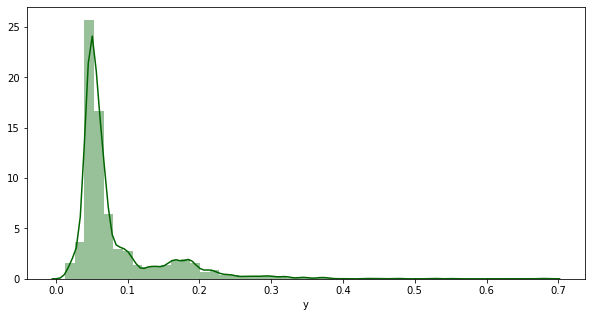

In [9]:
#Exploring the target variable
plt.figure(figsize=(10, 5))
sns.distplot(train['y'], color= 'darkgreen')

Andromeda Galaxy (M31)


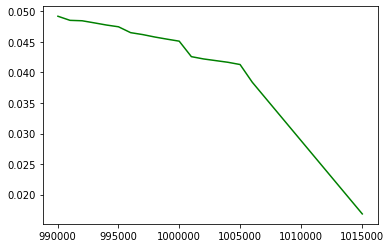

Andromeda I


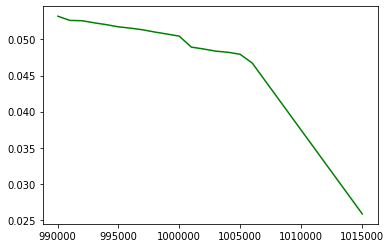

Andromeda II


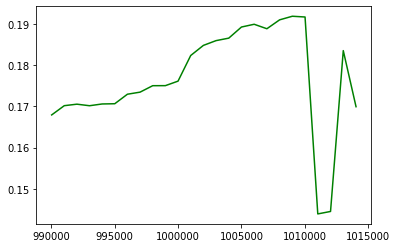

Andromeda III


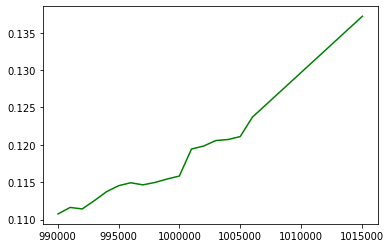

Andromeda IX


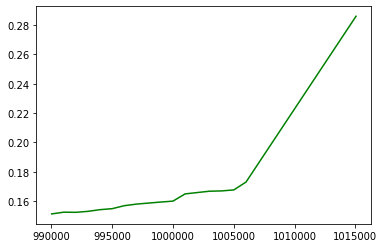

Andromeda V


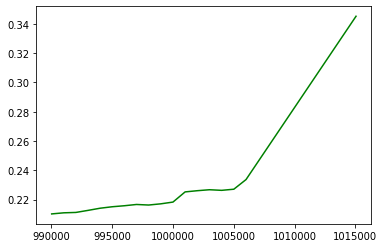

Andromeda VIII


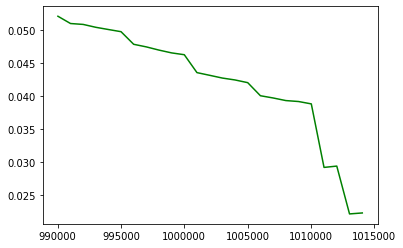

Andromeda X


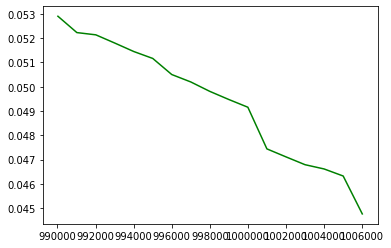

Andromeda XI


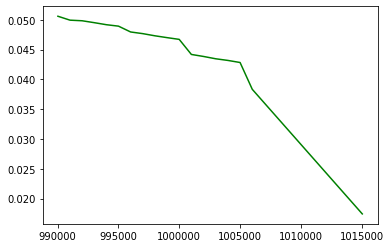

Andromeda XII


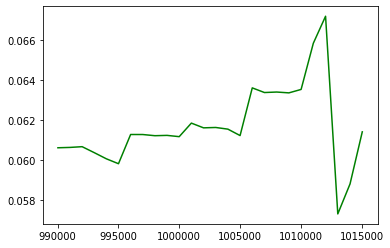

Andromeda XIX[60]


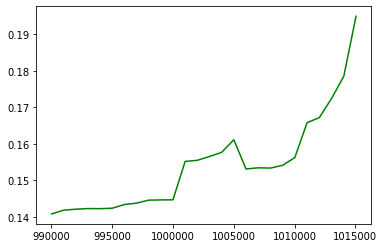

Andromeda XV


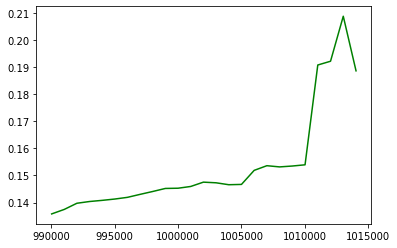

Andromeda XVII


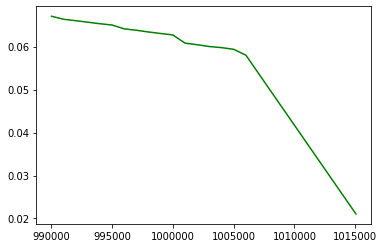

Andromeda XVIII[60]


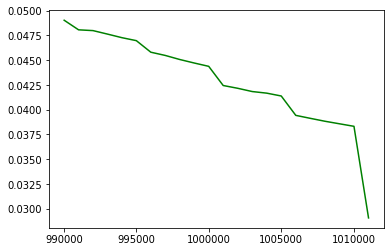

Andromeda XX


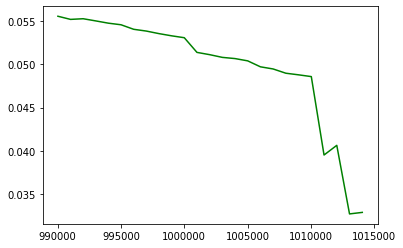

Andromeda XXIII


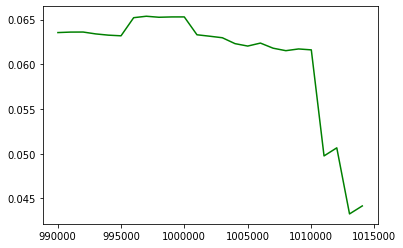

Andromeda XXII[57]


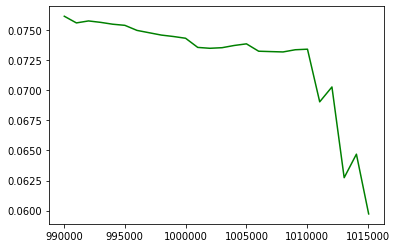

Andromeda XXIV


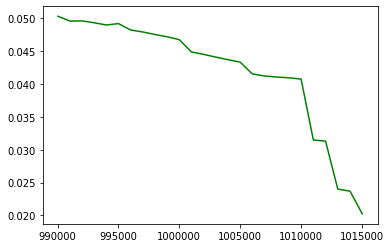

Andromeda XXIX


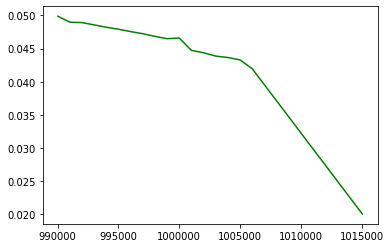

Andromeda XXI[57]


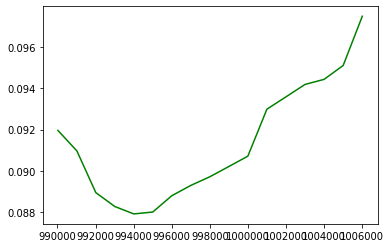

Andromeda XXV


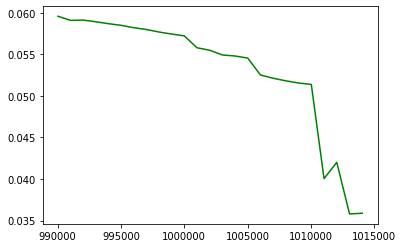

Andromeda XXVI


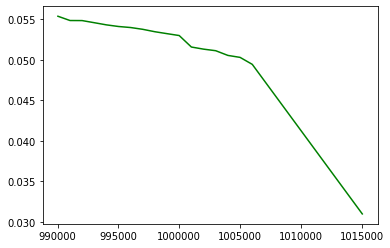

Andromeda XXVIII


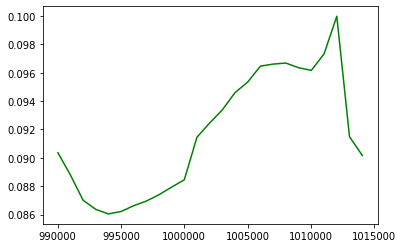

Antlia 2


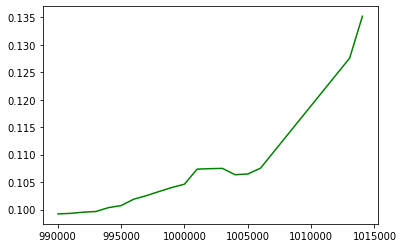

Antlia B


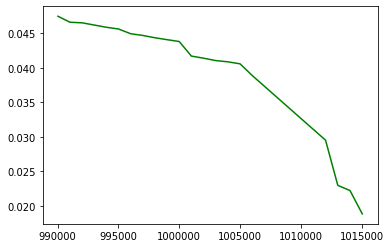

Antlia Dwarf


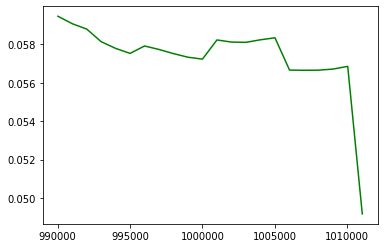

Aquarius Dwarf Galaxy (DDO 210)


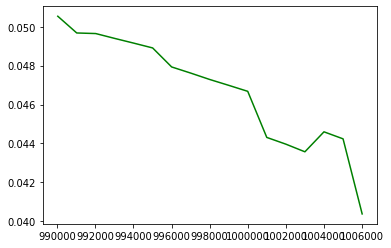

Aquarius II


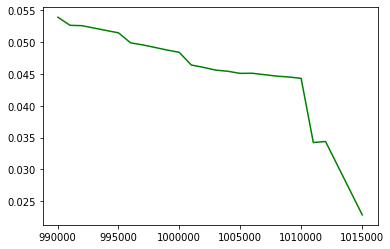

Barnard's Galaxy (NGC 6822)


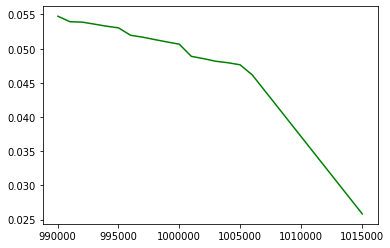

Boötes I


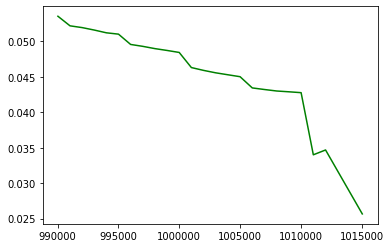

Boötes II


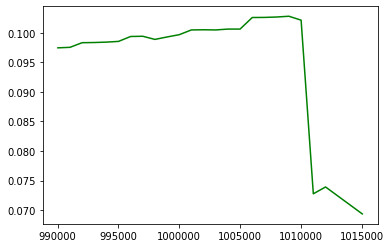

Boötes III


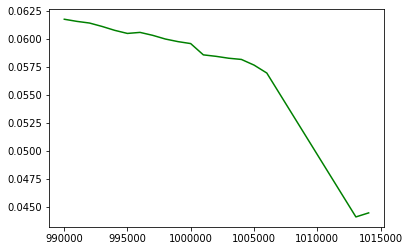

Boötes IV


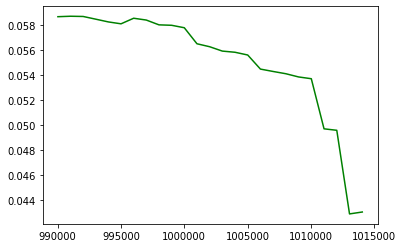

Camelopardalis B


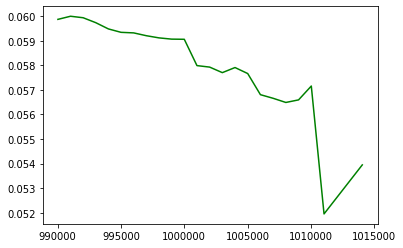

Canes Venatici I Dwarf


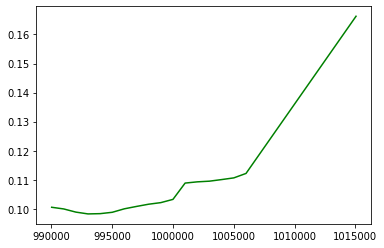

Canes Venatici II Dwarf


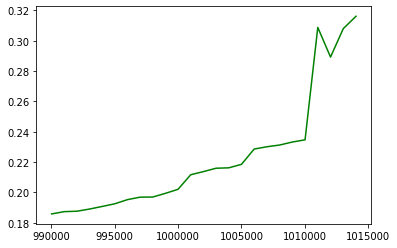

Carina Dwarf (E206-G220)


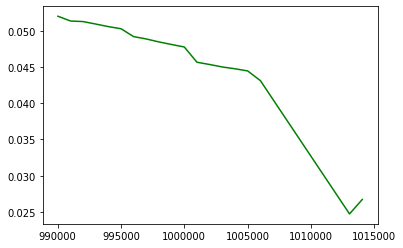

Carina II


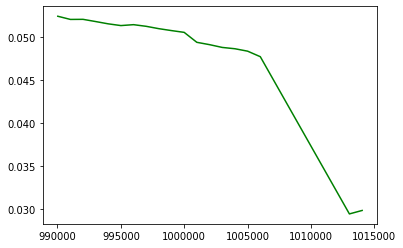

Carina III


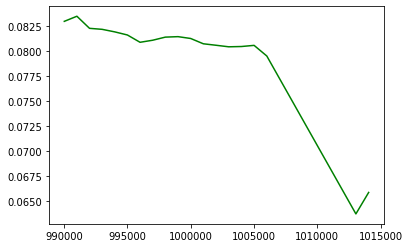

Cas 1 (KK98 19)


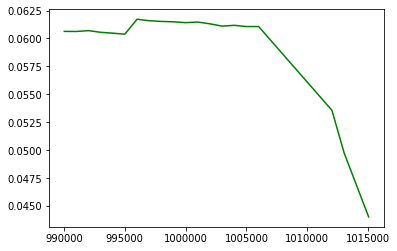

Cassiopeia Dwarf (Cas dSph, Andromeda VII)


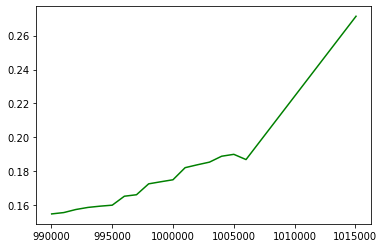

Cassiopeia II (Andromeda XXX)


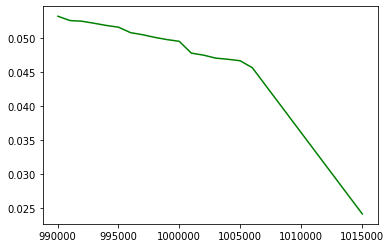

Cassiopeia III (Andromeda XXXII)


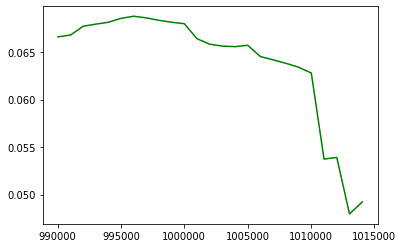

Cetus Dwarf


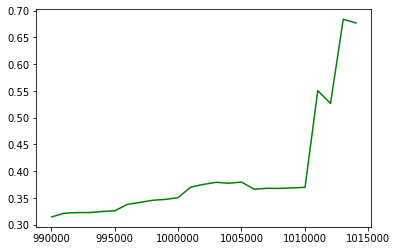

Cetus III


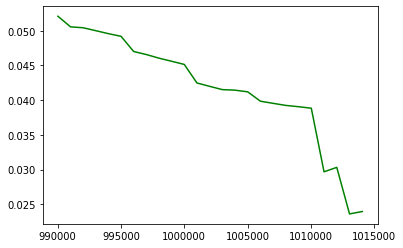

Columba I


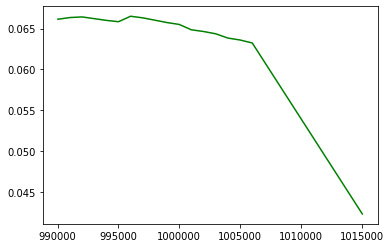

Coma Berenices Dwarf


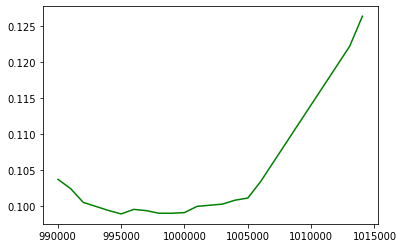

Crater II


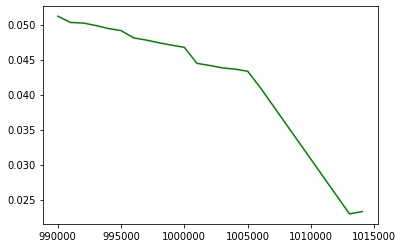

DDO 99 (UGC 6817)


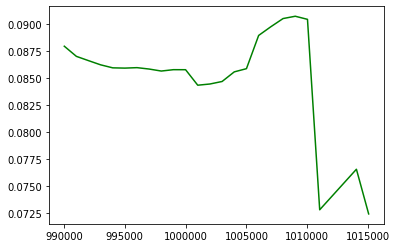

Donatiello I


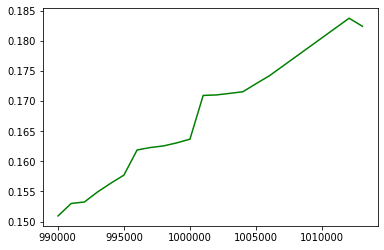

Draco Dwarf (DDO 208)


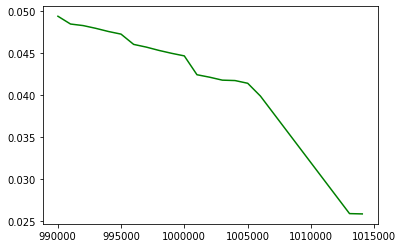

Draco II


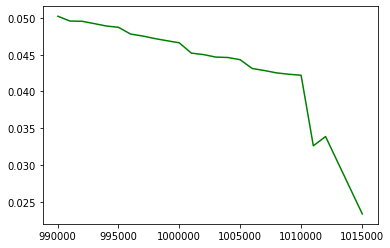

Dwingeloo 1


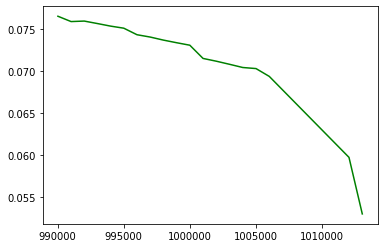

Dwingeloo 2


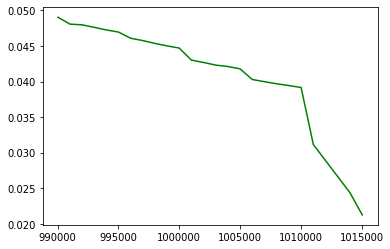

ESO 274-01[70]


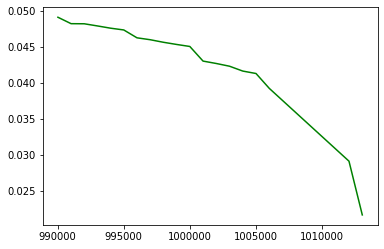

ESO 294-010


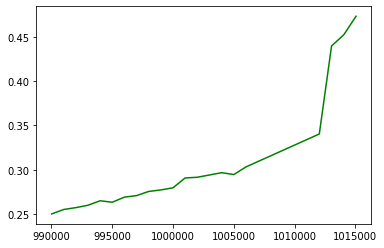

ESO 321-014[70]


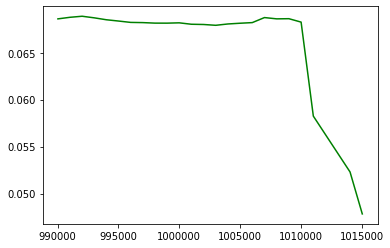

ESO 325-11


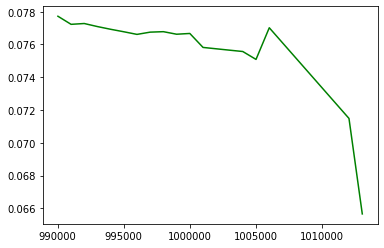

ESO 383-087 (ISG 39)


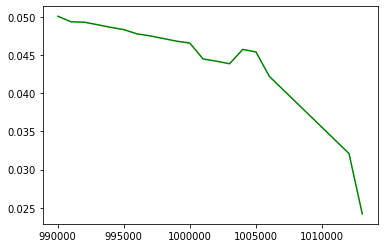

ESO 410-G005


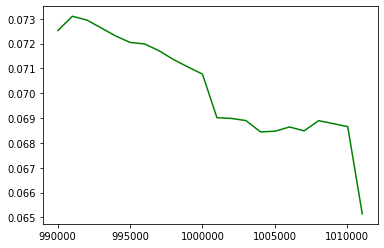

ESO 540-030 (KDG 2)


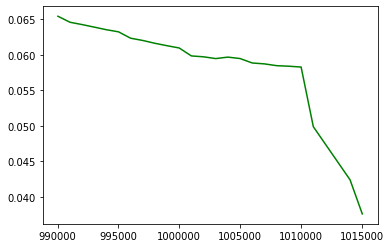

ESO 540-032


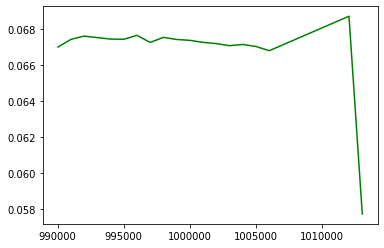

Eridanus II


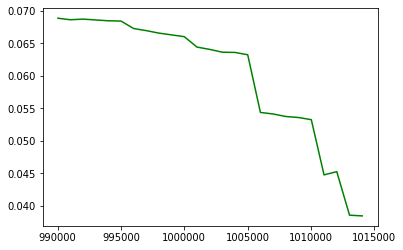

FM2000 1


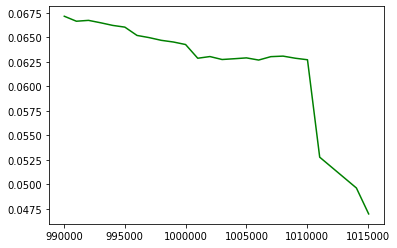

Fornax Dwarf (E356-G04)


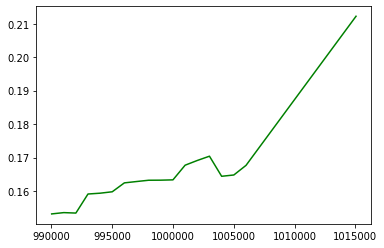

GR 8 (DDO 155)


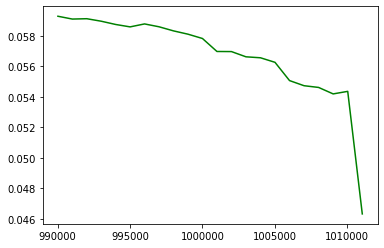

Grus I


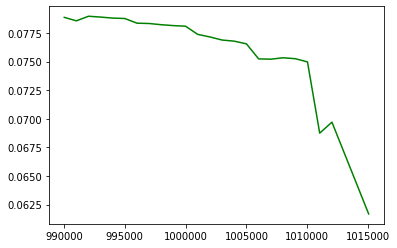

Grus II


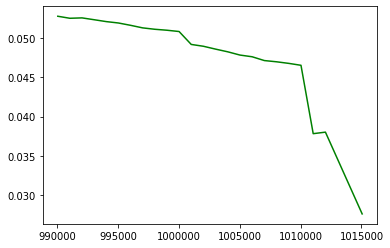

HIPASS J1247-77


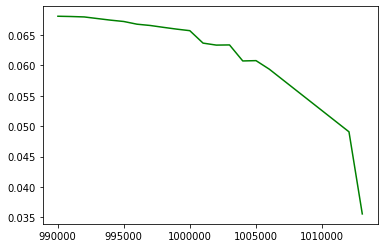

HIZSS 003


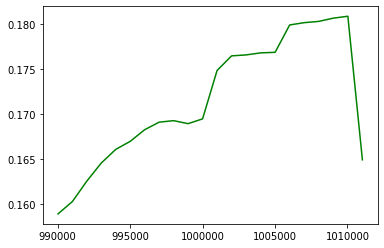

Hercules Dwarf


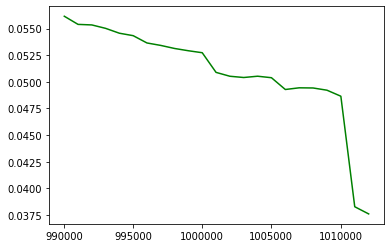

Holmberg II (DDO 50, UGC 4305)


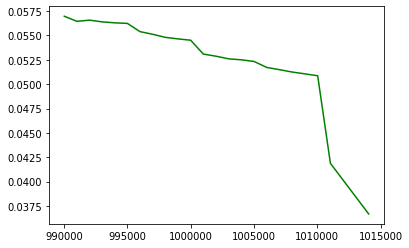

Horologium I


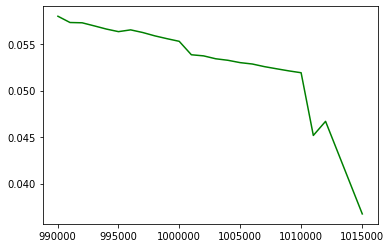

Horologium II


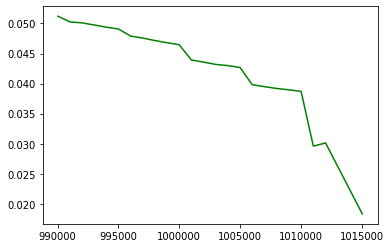

Hydra II


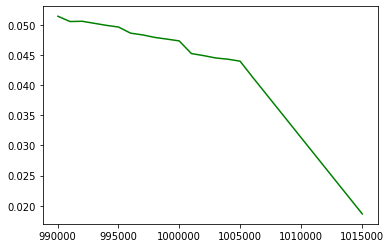

Hydrus I


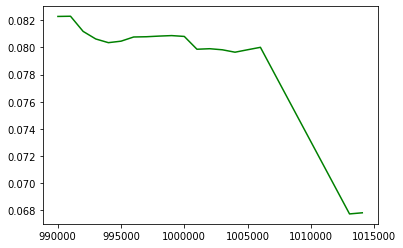

IC 10 (UGC 192)


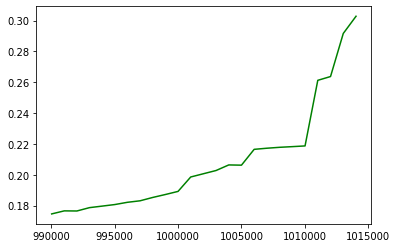

IC 1613 (UGC 668)


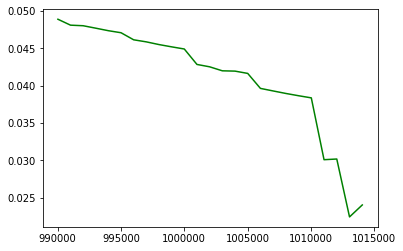

IC 3104


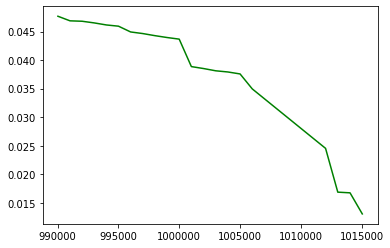

IC 342


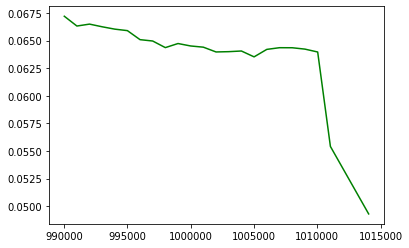

IC 4662 (ESO 102-14)


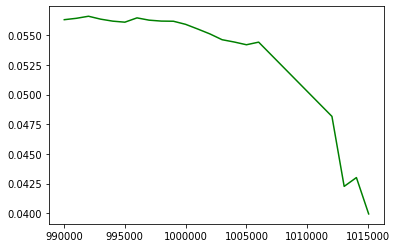

IC 5152


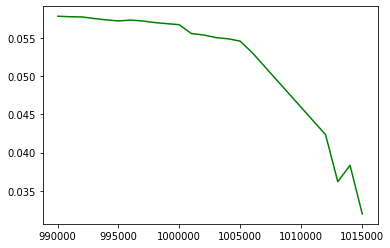

Indus II


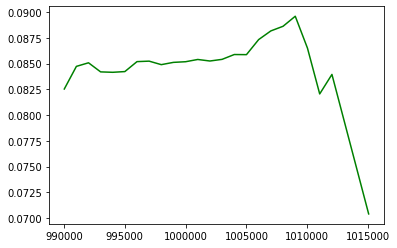

KK98 35


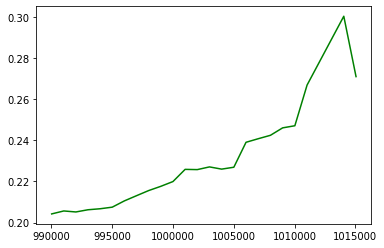

KK98 77


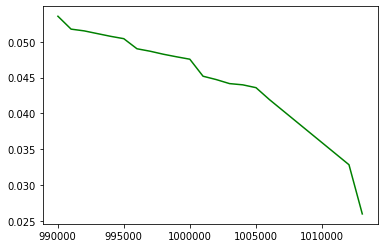

KKH 11 (ZOAG G135.74-04.53)


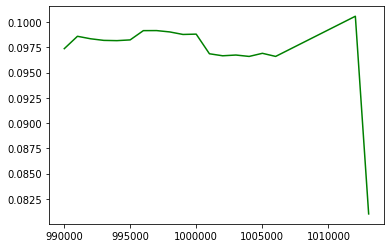

KKH 12


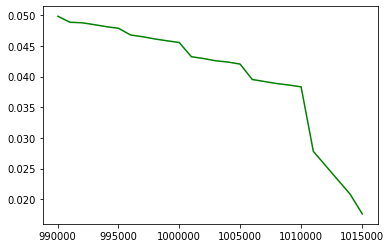

KKH 37 (Mai 16)


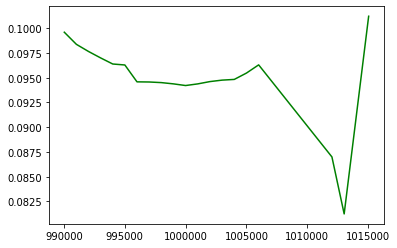

KKR 03 (KK98 230)


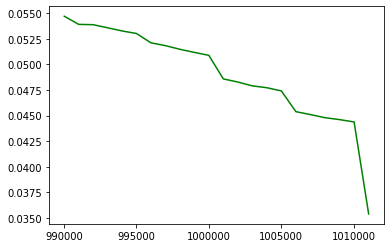

KKR 25


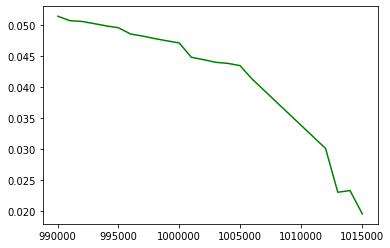

KKh 060


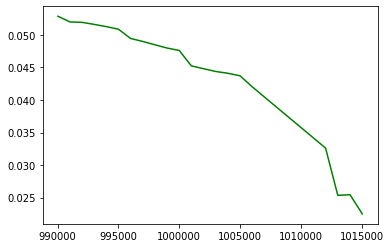

KKh 086


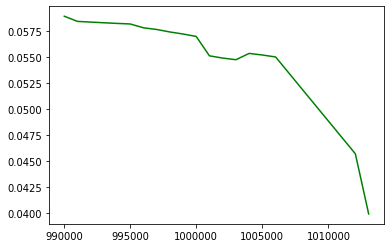

KKh 98


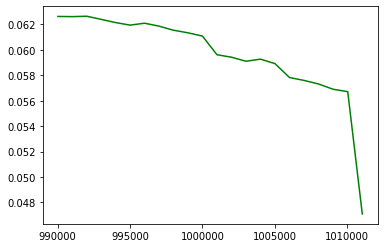

KKs 3


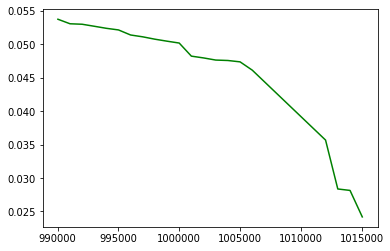

KUG 1210+301B (KK98 127)


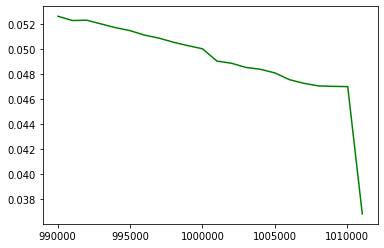

Lacerta I (Andromeda XXXI)


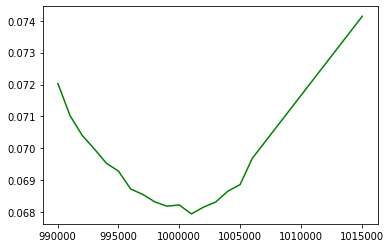

Large Magellanic Cloud (LMC)


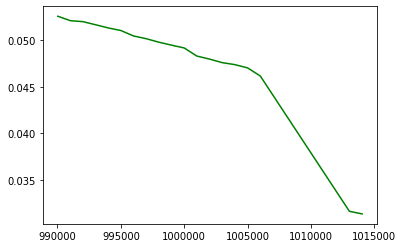

Leo A (Leo III, DDO 69)


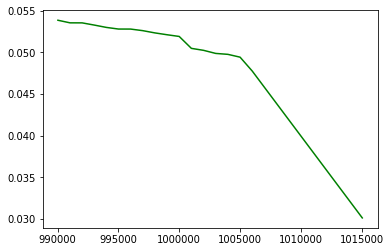

Leo I Dwarf (DDO 74, UGC 5470)


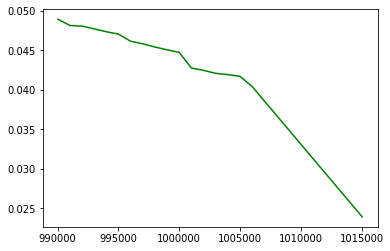

Leo II Dwarf (Leo B, DDO 93)


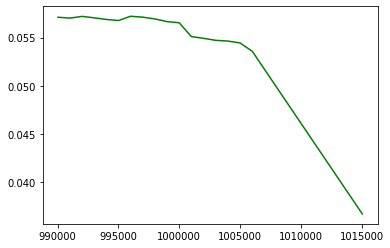

Leo IV Dwarf


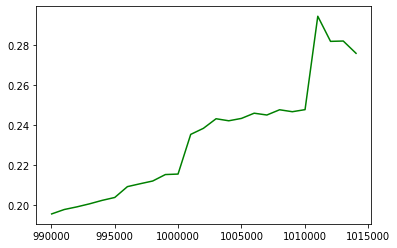

Leo P


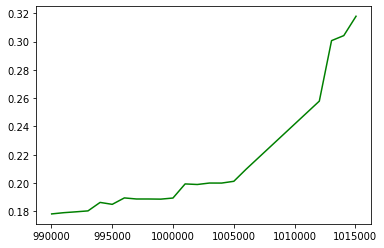

Leo T Dwarf


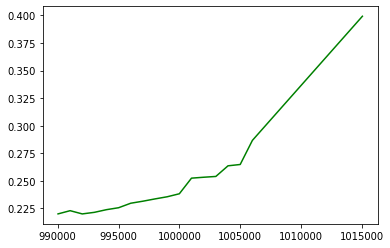

Leo V Dwarf


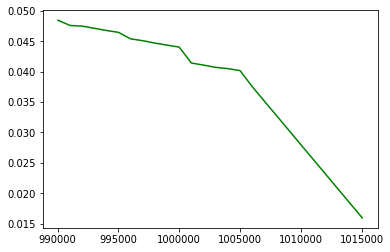

M110 (NGC 205)


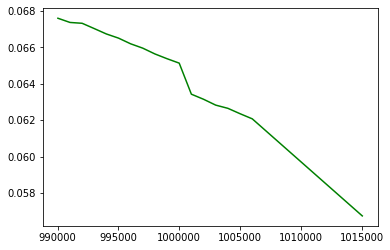

M32 (NGC 221)


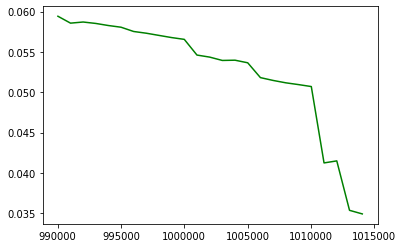

MB 1 (KK98 21)


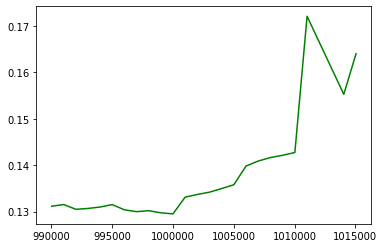

MB 3


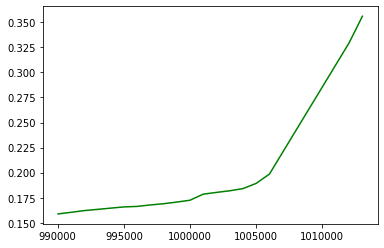

Maffei 1


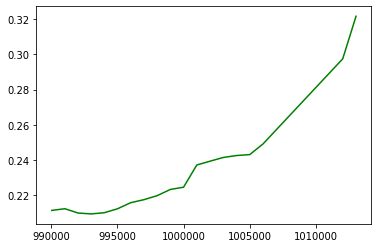

Maffei 2


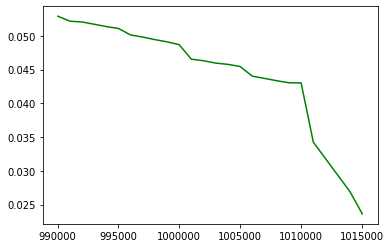

NGC 147 (DDO 3)


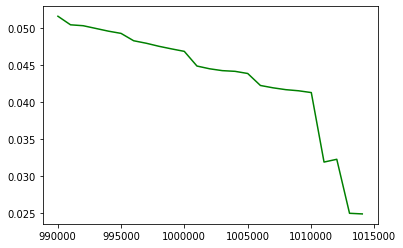

NGC 1560


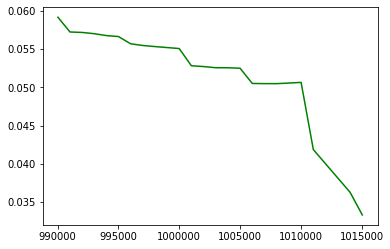

NGC 1569 (UGC 3056)


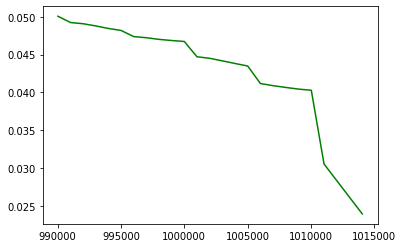

NGC 185


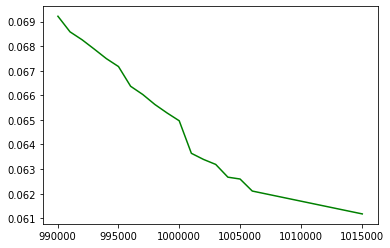

NGC 2366


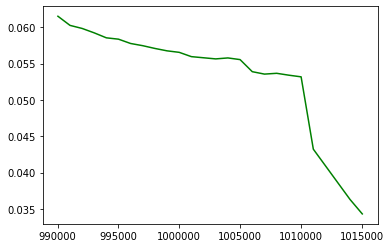

NGC 2403


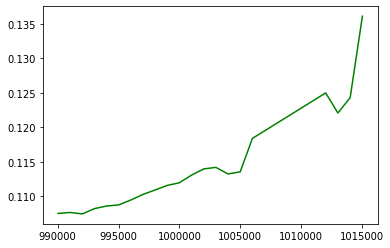

NGC 247


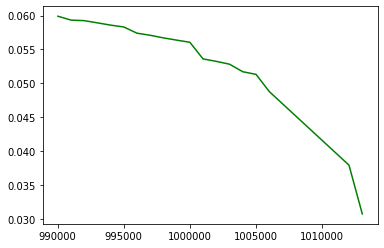

NGC 300


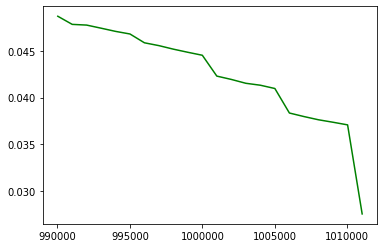

NGC 3109


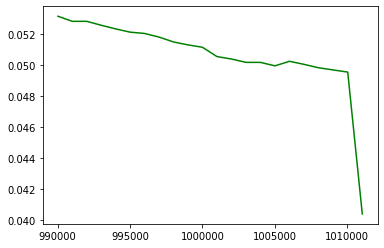

NGC 3741


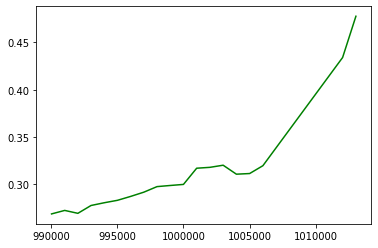

NGC 404


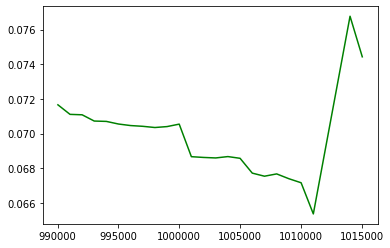

NGC 4163 (NGC 4167)


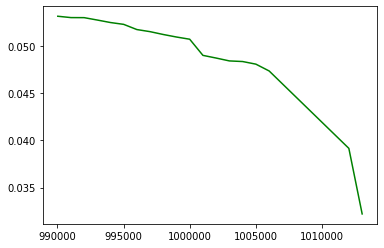

NGC 4214 (UGC 7278)


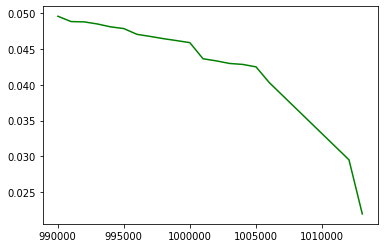

NGC 5102


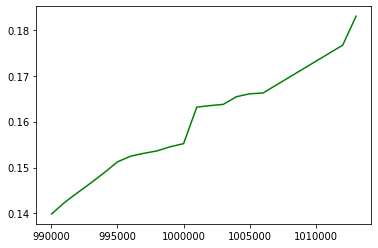

NGC 5206


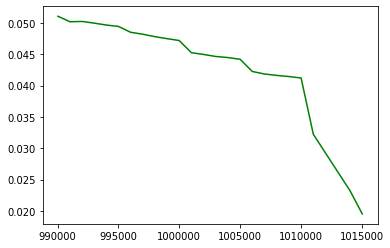

NGC 5237


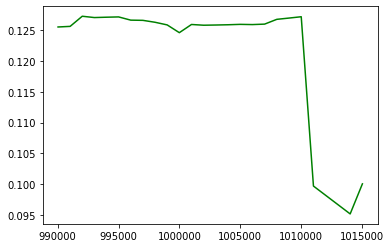

NGC 5253


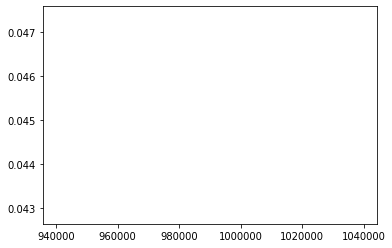

NGC 55


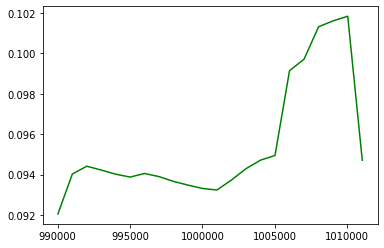

Pegasus Dwarf Irregular (DDO 216)


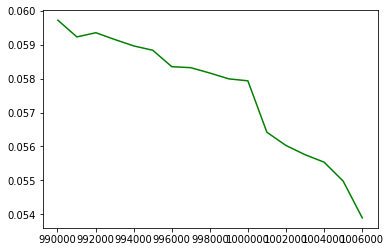

Pegasus Dwarf Sph (And VI)


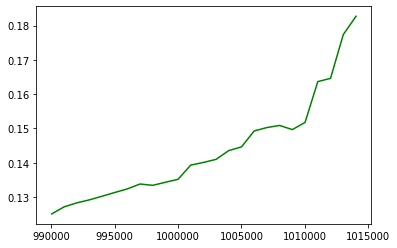

Pegasus III


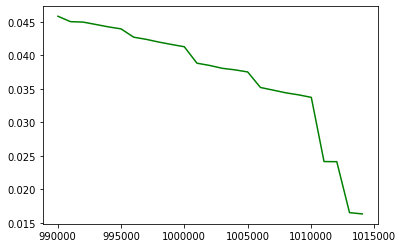

Perseus I (Andromeda XXXIII)


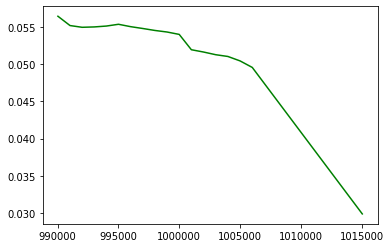

Phoenix Dwarf Galaxy (P 6830)


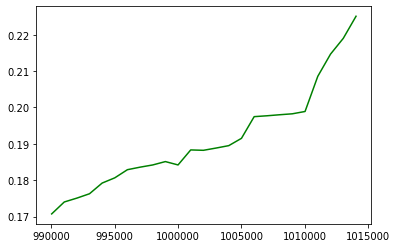

Phoenix II


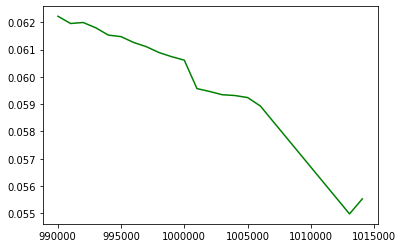

Pictor II


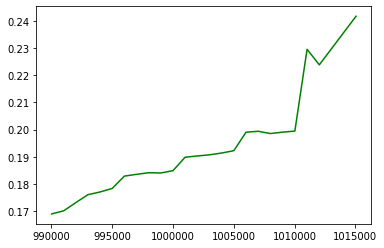

Pisces Dwarf


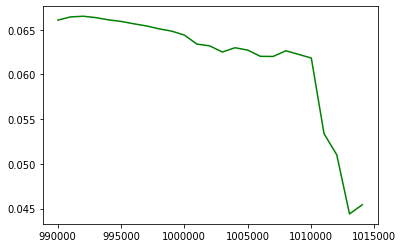

Pisces I


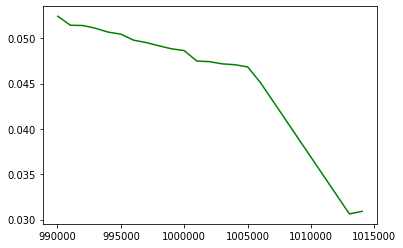

Pisces II


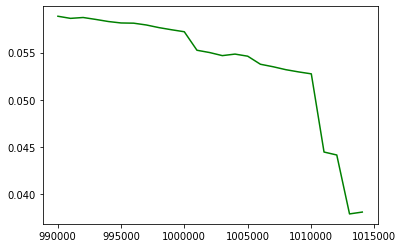

Pisces III (Andromeda XIII)


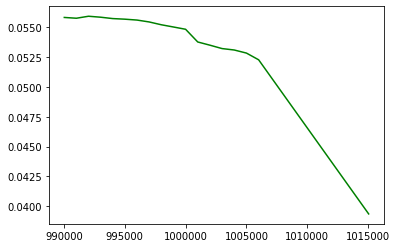

Pisces IV (Andromeda XIV)


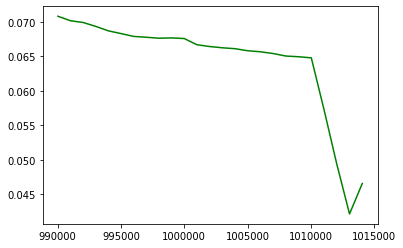

Pisces V (Andromeda XVI)


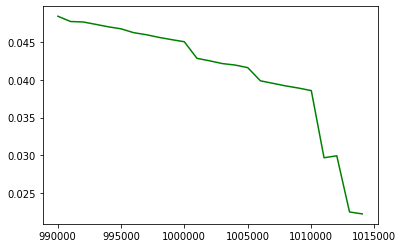

Reticulum II


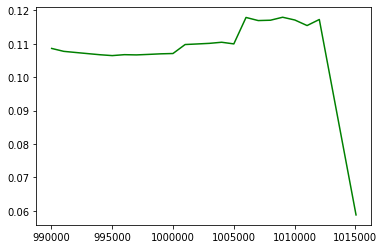

Reticulum III


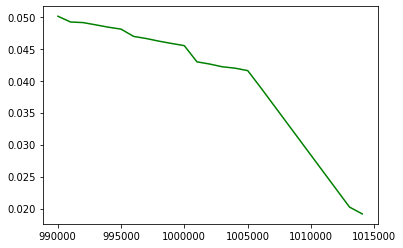

Sagittarius Dwarf Irregular Galaxy (SagDIG)


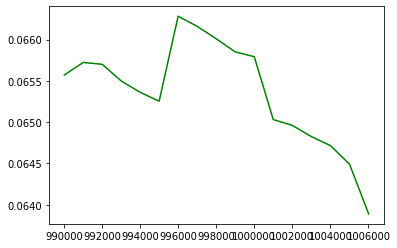

Sagittarius Dwarf Sphr SagDEG


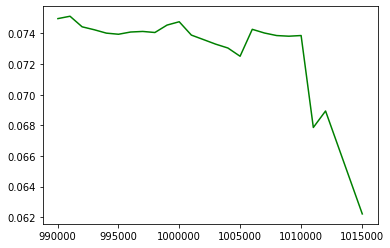

Sagittarius II


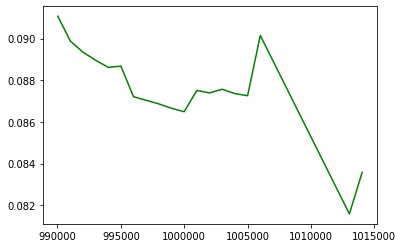

Sculptor Dwarf (E351-G30)


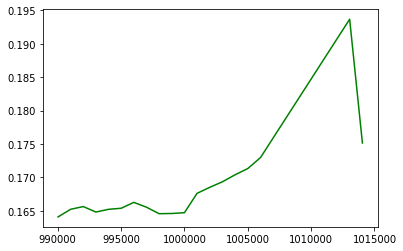

Segue 1


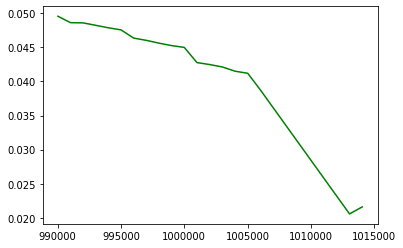

Segue 2


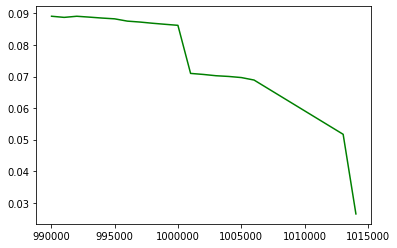

Sextans A (92205, DDO 75)


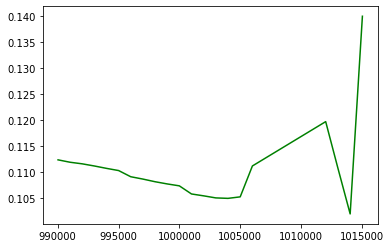

Sextans B (UGC 5373)


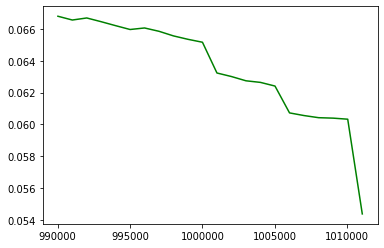

Sextans Dwarf Sph


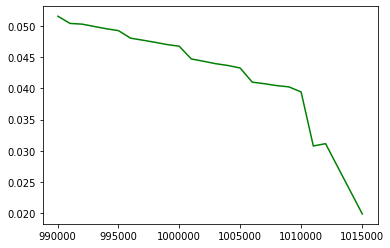

Small Magellanic Cloud (SMC, NGC 292)


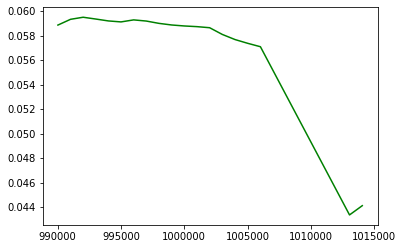

Triangulum Galaxy (M33)


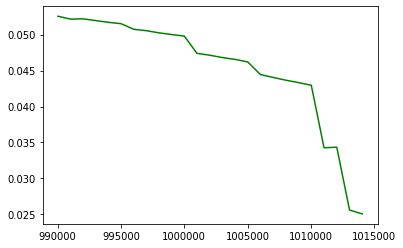

Triangulum II


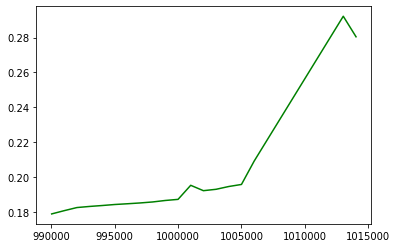

Tucana Dwarf


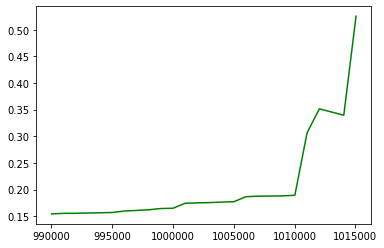

Tucana II


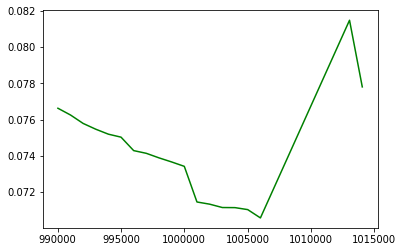

Tucana III


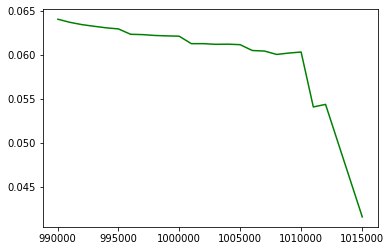

Tucana IV


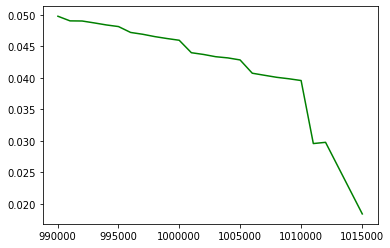

UGC 4483


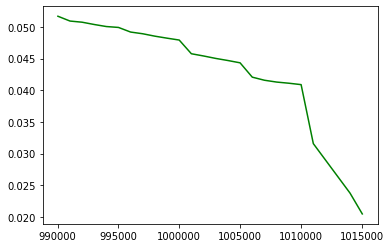

UGC 4879 (VV124)[61]


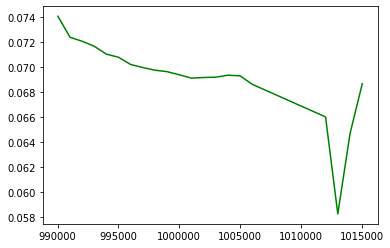

UGC 7577 (DDO 125)


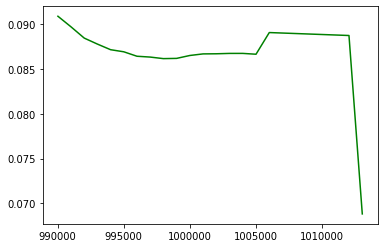

UGC 8508 (I Zw 060)


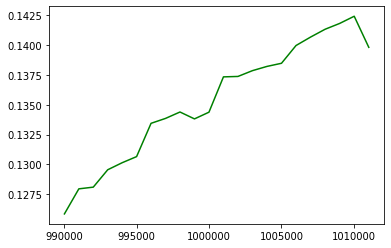

UGC 8651 (DDO 181)


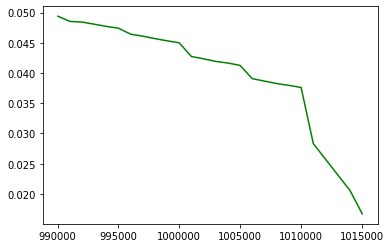

UGC 8833


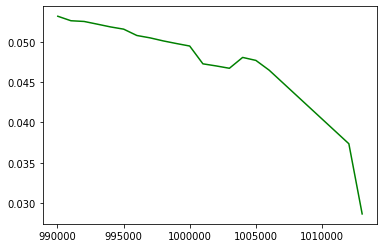

UGC 9128 (DDO 187)


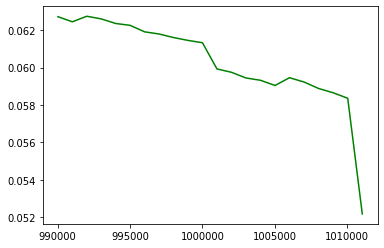

UGC 9240 (DDO 190)


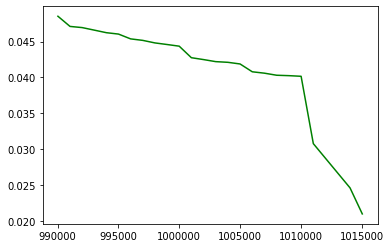

UGCA 105


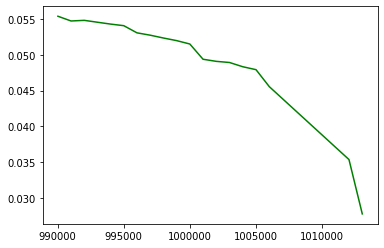

UGCA 133 (DDO 44)


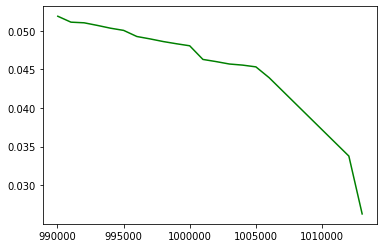

UGCA 15 (DDO 6)


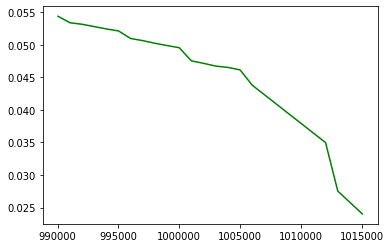

UGCA 276 (DDO 113)


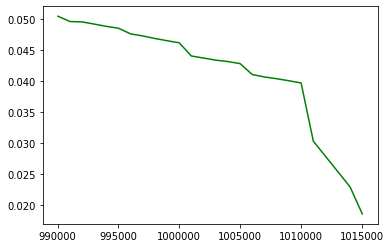

UGCA 292


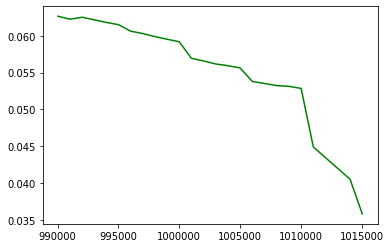

UGCA 438 (ESO 407-018)


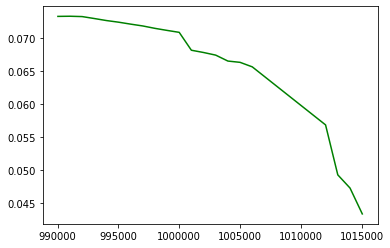

UGCA 86


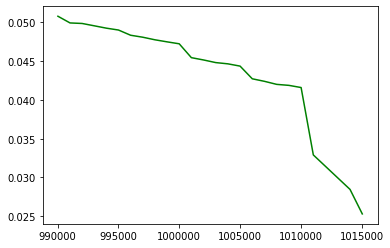

UGCA 92


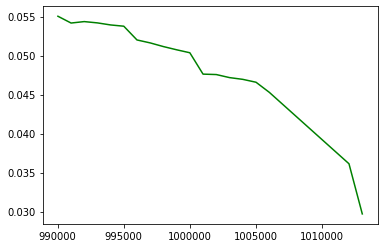

Ursa Major I Dwarf (UMa I dSph)


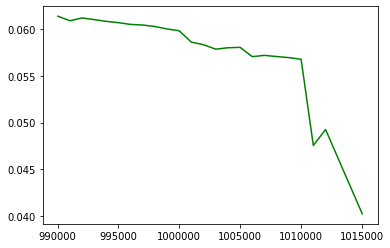

Ursa Major II Dwarf


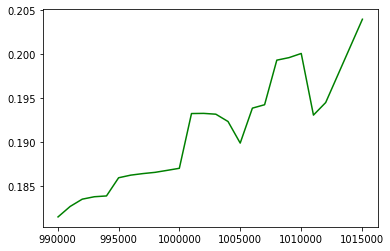

Ursa Minor Dwarf


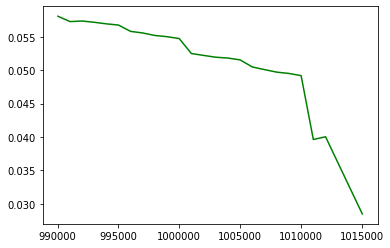

Virgo I


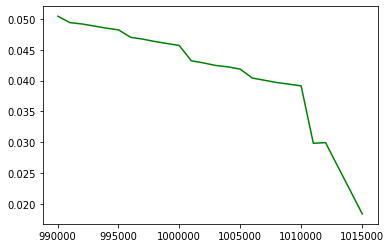

Willman 1


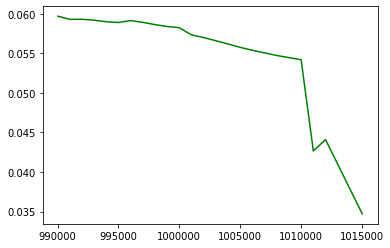

Wolf-Lundmark-Melotte (WLM, DDO 221)


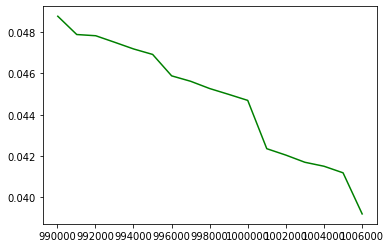

In [10]:
#Exploring each galaxy by galaxy year and y
for name,grp in train.groupby("galaxy"):
  print(name)
  plt.plot(grp["galactic year"],grp.y, 'g-')
  plt.show()

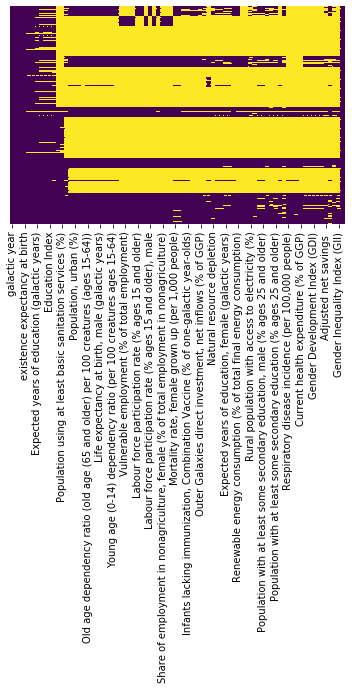

In [11]:
#Visualizing  null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
#Exploring which columns have the most null values
train.isnull().sum().sort_values(ascending = False)

Gender Inequality Index (GII)                           3021
Current health expenditure (% of GGP)                   2998
Interstellar Data Net users, total (% of population)    2993
Private galaxy capital flows (% of GGP)                 2991
Interstellar phone subscriptions (per 100 people)       2974
                                                        ... 
existence expectancy at birth                              1
existence expectancy index                                 1
galaxy                                                     0
y                                                          0
galactic year                                              0
Length: 80, dtype: int64

In [13]:
#Percentage of null values in each column
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_train.sort_values('percent_missing', ascending = False)

,column_name,percent_missing
Gender Inequality Index (GII),Gender Inequality Index (GII),78.163001
Current health expenditure (% of GGP),Current health expenditure (% of GGP),77.567917
"Interstellar Data Net users, total (% of population)","Interstellar Data Net users, total (% of popul...",77.438551
Private galaxy capital flows (% of GGP),Private galaxy capital flows (% of GGP),77.386805
Interstellar phone subscriptions (per 100 people),Interstellar phone subscriptions (per 100 people),76.946960
...,...,...
existence expectancy at birth,existence expectancy at birth,0.025873
existence expectancy index,existence expectancy index,0.025873
galactic year,galactic year,0.000000
galaxy,galaxy,0.000000


In [14]:
#Percentage of null values in data
print(f'Overall missing values: {100-sum(train.isnull().sum().values)/(len(train.columns)*3865 )*100:.2f}%')

Overall missing values: 39.94%


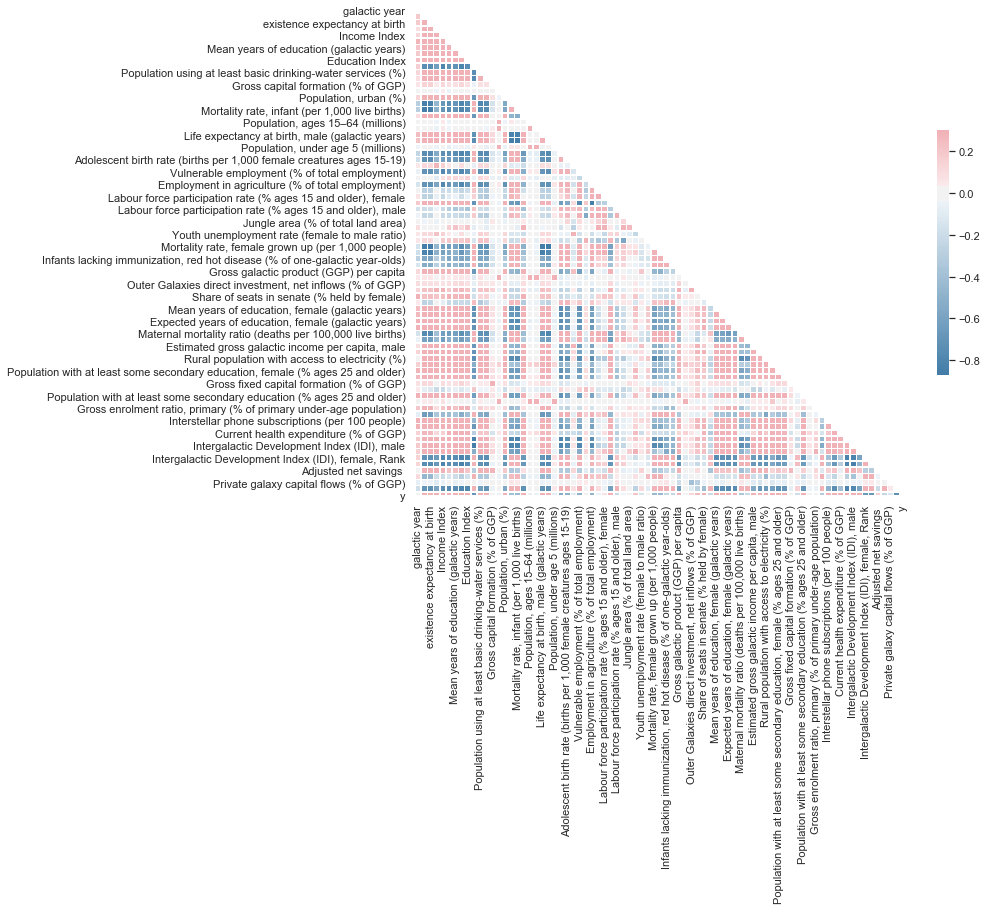

In [15]:
#Creating correlation heatmap
sns.set(style="white")

rs = np.random.RandomState(33)
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
#Finding the variables that affect y most
train.corr().y.sort_values(ascending=False)

y                                                                                   1.000000
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.679981
Estimated gross galactic income per capita, female                                  0.667465
Interstellar Data Net users, total (% of population)                                0.651823
Intergalactic Development Index (IDI)                                               0.625114
                                                                                      ...   
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)                   -0.533741
Intergalactic Development Index (IDI), female, Rank                                -0.664882
Intergalactic Development Index (IDI), male, Rank                                  -0.680577
Intergalactic Development Index (IDI), Rank                                        -0.681592
Gender Inequality Index (GII)                                         

In [17]:
#Since the columns that has more null values also has high correlation with y, we can not drop those columns.
imputer = KNNImputer(n_neighbors=40)

train2 = imputer.fit_transform(train.drop(['galaxy', 'y'], axis=1))
train2 = pd.DataFrame(data=train2, columns=train.drop(['galaxy', 'y'], axis=1).columns)
train2['galaxy'] = train['galaxy']
train2['y'] = train['y']

test2 = imputer.transform(test.drop(['galaxy'], axis=1))
test2 = pd.DataFrame(data=test2, columns=test.drop(['galaxy'], axis=1).columns)
test2['galaxy'] = test['galaxy']

In [18]:
train2.corrwith(train['y']).sort_values(ascending=False)

y                                                                                   1.000000
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.686768
Intergalactic Development Index (IDI), male                                         0.628476
Intergalactic Development Index (IDI)                                               0.627487
Intergalactic Development Index (IDI), female                                       0.621540
                                                                                      ...   
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)                   -0.574678
Intergalactic Development Index (IDI), female, Rank                                -0.650207
Intergalactic Development Index (IDI), male, Rank                                  -0.657921
Intergalactic Development Index (IDI), Rank                                        -0.676515
Gender Inequality Index (GII)                                         

In [19]:
#Standardizing features 
scaler = StandardScaler()

scaled_train = scaler.fit_transform(train2.drop(['galaxy', 'y'], axis=1))
scaled_train = pd.DataFrame(data=scaled_train, columns=train2.drop(['galaxy', 'y'], axis=1).columns)
scaled_train['galaxy'] = train['galaxy']
scaled_train['y'] = train['y']

scaled_test = scaler.transform(test2.drop(['galaxy'], axis=1))
scaled_test = pd.DataFrame(data=scaled_test, columns=test2.drop(['galaxy'], axis=1).columns)
scaled_test['galaxy'] = test['galaxy']

In [20]:
train2.drop(['galaxy', 'y'], axis=1)

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,990025.0,0.628657,63.125200,27109.234310,0.646039,8.240543,9.429352,0.751547,0.665122,123.918017,...,7.907200,0.661974,0.703696,0.968521,127.840660,128.007991,21.812906,5.164382,25.183181,0.742354
1,990025.0,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,...,7.691784,0.764828,0.795177,0.996014,115.616376,113.120437,19.177926,5.400115,22.785018,0.698948
2,990025.0,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,...,7.660228,0.581833,0.654998,0.925031,145.018149,144.930927,21.151265,6.534020,27.660133,0.814736
3,990025.0,0.555862,52.333293,19125.468148,0.631403,9.371397,6.258433,0.571371,0.468157,168.163596,...,7.197901,0.567409,0.633486,0.915347,139.678526,137.047539,14.999292,5.912194,29.084635,0.817722
4,990025.0,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,...,10.706377,1.022867,1.036543,1.043879,65.739015,59.246618,30.263903,5.611753,19.780858,0.348658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,1015056.0,1.029704,82.832063,34310.471408,0.855094,18.578586,10.557143,0.906573,0.862826,144.896214,...,10.392312,0.943410,0.902237,1.060532,124.564121,143.907576,26.438719,3.023709,29.294865,0.580785
3861,1015056.0,0.937869,75.877098,36899.067719,0.929494,16.153857,9.151665,0.865822,0.747577,164.692000,...,10.296360,0.915225,0.798083,1.055118,163.664516,184.291155,20.637654,4.470596,31.085400,0.517558
3862,1015056.0,1.036144,93.540275,37002.977875,1.085245,21.066473,16.661344,0.983835,1.100779,63.726437,...,9.601421,1.097208,1.044890,1.114754,66.498714,112.887035,28.154859,5.193997,32.145570,0.363862
3863,1015056.0,0.939034,78.274427,28180.459770,0.687655,9.388911,8.908748,0.735694,0.602703,216.805701,...,4.137744,0.596164,0.754729,0.825864,182.249079,175.408953,38.963157,2.854140,27.227179,0.711878


In [21]:
test2.drop(['galaxy'], axis=1)

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012.0,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,...,8.412800,0.651157,0.701780,0.958076,170.243696,170.984705,14.958044,8.315925,21.999934,0.776072
1,1007012.0,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,...,8.617849,0.645347,0.694524,0.970926,170.468822,174.663202,11.860480,9.242517,21.800151,0.777127
2,1008016.0,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771,...,8.409694,0.755837,0.790079,0.979591,147.213999,145.075512,19.430207,6.640184,21.851002,0.707715
3,1007012.0,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060,...,8.544858,0.695065,0.721225,0.971869,157.909955,156.323856,19.537075,6.637974,23.219392,0.757695
4,1013042.0,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069,...,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,18.874048,7.687626,24.024170,0.681615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1016064.0,0.935055,80.640429,34087.356461,0.878365,16.593583,11.752456,0.861375,0.851735,146.313875,...,9.359643,0.850287,0.871581,1.026414,129.479636,134.601731,19.527627,5.978416,23.159956,0.584013
886,1016064.0,0.935055,80.640429,34087.356461,0.878365,16.593583,11.752456,0.861375,0.851735,146.313875,...,9.359643,0.850287,0.871581,1.026414,129.479636,134.601731,19.527627,5.978416,23.159956,0.584013
887,1016064.0,0.935055,80.640429,34087.356461,0.878365,16.593583,11.752456,0.861375,0.851735,146.313875,...,9.359643,0.850287,0.871581,1.026414,129.479636,134.601731,19.527627,5.978416,23.159956,0.584013
888,1016064.0,0.935055,80.640429,34087.356461,0.878365,16.593583,11.752456,0.861375,0.851735,146.313875,...,9.359643,0.850287,0.871581,1.026414,129.479636,134.601731,19.527627,5.978416,23.159956,0.584013


In [22]:
#Converting our variables to dummies in order to be able to use in models
train2 = pd.concat([train2, pd.get_dummies(train2['galaxy'])], axis=1).drop(['galaxy'], axis=1)
test2 = pd.concat([test2, pd.get_dummies(test2['galaxy'])], axis=1).drop(['galaxy'], axis=1)

scaled_train = pd.concat([scaled_train, pd.get_dummies(scaled_train['galaxy'])], axis=1).drop(['galaxy'], axis=1)
scaled_test = pd.concat([scaled_test, pd.get_dummies(scaled_test['galaxy'])], axis=1).drop(['galaxy'], axis=1)

In [23]:
#Changing column names in order to be able to use in models (especially, in xgboost)
def normilize_column_names(string):
    new = ""
    for i in string:
        if i.isalnum() == True or i == " ":
            new += i
    return new

new_names = {}
for i in train2.columns:
    new_names[i] = normilize_column_names(i)

train2.rename(columns=new_names, inplace=True)
test2.rename(columns=new_names, inplace=True)

scaled_train.rename(columns=new_names, inplace=True)
scaled_test.rename(columns=new_names, inplace=True)

In [24]:
galaxy_list = []
new_test_galaxy = []
for i in train.galaxy.unique():
    galaxy_list.append(i)
for i in test.galaxy.unique():
    galaxy_list.append(i)

for key, value in Counter(galaxy_list).items():
    if value == 1:
        print(key)
        new_test_galaxy.append(key)

Tucana Dwarf
Andromeda XXII[57]
Andromeda XVIII[60]
Triangulum Galaxy (M33)
Andromeda XXIV
Andromeda XII
NGC 5253
Andromeda XIX[60]
Hercules Dwarf


In [25]:
for i in new_test_galaxy:
    test2[i] = 0
    scaled_test[i] = 0

In [26]:
train2 = train2.reindex(sorted(train2.columns), axis=1)
test2 = test2.reindex(sorted(test2.columns), axis=1)

scaled_train = scaled_train.reindex(sorted(scaled_train.columns), axis=1)
scaled_test = scaled_test.reindex(sorted(scaled_test.columns), axis=1)

In [27]:
train2.dropna(inplace=True)
test2.dropna(inplace=True)

scaled_train.dropna(inplace=True)
scaled_test.dropna(inplace=True)

In [28]:
train2

,Adjusted net savings,Adolescent birth rate births per 1000 female creatures ages 1519,Andromeda Galaxy M31,Andromeda I,Andromeda II,Andromeda III,Andromeda IX,Andromeda V,Andromeda VIII,Andromeda X,...,Virgo I,Vulnerable employment of total employment,Willman 1,WolfLundmarkMelotte WLM DDO 221,Young age 014 dependency ratio per 100 creatures ages 1564,Youth unemployment rate female to male ratio,existence expectancy at birth,existence expectancy index,galactic year,y
0,21.812906,174.617899,0,0,0,0,0,0,0,0,...,0,68.213690,0,0,98.216072,2.211801,63.125200,0.628657,990025.0,0.052590
1,19.177926,109.892385,0,0,0,0,0,0,0,0,...,0,68.960017,0,0,88.322574,2.238024,81.004994,0.818082,990025.0,0.059868
2,21.151265,230.573666,0,0,0,0,0,0,0,0,...,1,92.066061,0,0,114.163995,2.073602,59.570534,0.659443,990025.0,0.050449
3,14.999292,198.971328,0,0,0,0,0,0,0,0,...,0,109.153574,0,0,97.645232,2.030830,52.333293,0.555862,990025.0,0.049394
4,30.263903,61.008654,0,0,0,0,0,0,0,0,...,0,42.040447,0,0,53.835875,2.466819,81.802464,0.991196,990025.0,0.154247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,26.438719,138.228369,0,0,0,0,0,0,0,0,...,0,53.007940,0,0,65.871536,2.747229,82.832063,1.029704,1015056.0,0.042324
3861,20.637654,136.053584,0,0,0,0,0,0,0,0,...,0,73.190135,0,0,59.465322,1.998149,75.877098,0.937869,1015056.0,0.036725
3862,28.154859,53.966958,0,0,0,0,0,0,0,0,...,0,45.279184,0,0,47.791507,1.518289,93.540275,1.036144,1015056.0,0.166271
3863,38.963157,105.408616,0,0,0,0,0,0,0,0,...,0,72.616874,0,0,81.919256,2.530626,78.274427,0.939034,1015056.0,0.024187


In [29]:
test2

,Adjusted net savings,Adolescent birth rate births per 1000 female creatures ages 1519,Andromeda Galaxy M31,Andromeda I,Andromeda II,Andromeda III,Andromeda IX,Andromeda V,Andromeda VIII,Andromeda X,...,Ursa Minor Dwarf,Virgo I,Vulnerable employment of total employment,Willman 1,WolfLundmarkMelotte WLM DDO 221,Young age 014 dependency ratio per 100 creatures ages 1564,Youth unemployment rate female to male ratio,existence expectancy at birth,existence expectancy index,galactic year
0,14.958044,140.058005,0,0,0,0,0,0,0,0,...,0,0,96.186054,0,0,95.424157,1.974738,51.562543,0.456086,1007012.0
1,11.860480,161.088558,0,0,0,0,0,0,0,0,...,0,0,100.618785,0,0,100.545672,2.071488,57.228262,0.529835,1007012.0
2,19.430207,129.738882,0,0,0,0,0,0,0,0,...,0,0,79.310450,0,0,85.768965,2.385658,59.379539,0.560976,1008016.0
3,19.537075,143.208581,0,0,0,0,0,0,0,0,...,0,0,85.309911,0,0,95.970483,2.284528,59.952390,0.565910,1007012.0
4,18.874048,162.451451,0,0,0,0,0,0,0,0,...,0,1,126.050516,0,0,111.084652,2.043633,55.428320,0.588274,1013042.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,19.527627,102.172815,0,0,0,0,0,0,0,0,...,0,0,70.964899,0,0,72.137028,2.195162,80.640429,0.935055,1016064.0
886,19.527627,102.172815,0,0,0,0,0,0,0,0,...,0,0,70.964899,0,0,72.137028,2.195162,80.640429,0.935055,1016064.0
887,19.527627,102.172815,0,0,0,0,0,0,0,0,...,0,0,70.964899,0,0,72.137028,2.195162,80.640429,0.935055,1016064.0
888,19.527627,102.172815,0,0,0,0,0,0,0,0,...,0,0,70.964899,0,0,72.137028,2.195162,80.640429,0.935055,1016064.0


# Modelling

##### Splitting out data to train and test and building models

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train2.drop(['y'], axis=1), train2['y'], test_size=0.3, random_state=42)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_train.drop(['y'], axis=1), scaled_train['y'], test_size=0.3, random_state=42)

In [31]:
model_error = {}

##### Linear Regression

In [32]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train_scaled)

pred_lr = model_lr.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_lr))
r2_lr = r2_score(y_test_scaled, pred_lr)
model_error['LinearRegression'] = lr_rmse
print('RMSE: %f' % lr_rmse, '\n' 'r2 score: %f' % r2_lr)

RMSE: 0.014628 
r2 score: 0.945193


##### Ridge Regression

In [33]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train_scaled, y_train_scaled)

pred_ridge = model_ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_ridge))
r2_ridge = r2_score(y_test_scaled, pred_ridge)
model_error['Ridge LinearRegression'] = ridge_rmse
print('RMSE: %f' % ridge_rmse, '\n' 'r2 score: %f' % r2_ridge)

RMSE: 0.015227 
r2 score: 0.940618


##### Lasso Regression

In [34]:
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train_scaled, y_train_scaled)

pred_lasso = model_lasso.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_lasso))
r2_lasso = r2_score(y_test_scaled, pred_lasso)
model_error['Lasso LinearRegression'] = lasso_rmse
print('RMSE: %f' % lasso_rmse, '\n' 'r2 score: %f' % r2_lasso)

RMSE: 0.062489 
r2 score: -0.000128


##### Support Vector Regression (SVR)

In [35]:
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train_scaled)

pred_svr = model_svr.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_svr))
r2_svr = r2_score(y_test_scaled, pred_svr)
model_error['SVRegressor'] = svr_rmse
print('RMSE: %f' % svr_rmse, '\n' 'r2 score: %f' % r2_svr)

RMSE: 0.062546 
r2 score: -0.001954


##### XGBoost 

In [36]:
model_xgboost = xgboost.XGBRegressor(max_depth=8)
model_xgboost.fit(X_train, y_train)

pred_xgb = model_xgboost.predict(X_test)
xgboost_rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
r2_xgb = r2_score(y_test, pred_xgb)
model_error['XGBoost'] = xgboost_rmse
print('RMSE: %f' % xgboost_rmse, '\n' 'r2 score: %f' % r2_xgb)

RMSE: 0.019251 
r2 score: 0.905081


##### Random Forest Regression 

In [37]:
model_rf = RandomForestRegressor(n_estimators=200)
model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)
model_error['RandomForest'] = rf_rmse
print('RMSE: %f' % rf_rmse, '\n' 'r2 score: %f' % r2_rf)

RMSE: 0.022296 
r2 score: 0.872678


##### As in linear regression RMSE is the closest to 0 and r2 approaching 1 comparing to other models meaning that there is  high accuracy between observed and predicted values,  using linear regression model as final decision.

In [38]:
#Galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available in the foreseeable future.
pred_index_lr = model_lr.predict(scaled_test)
sub_lr = pd.DataFrame({
    'Index':test.index,
    'pred':pred_index_lr,
    'opt_pred':0,
    'eei':test2['existence expectancy index']
})
n_low_eei_lr = sub_lr.loc[sub_lr.eei < 0.7].shape[0]
n_high_eei_lr = sub_lr.loc[sub_lr.eei >= 0.7].shape[0]
print(n_low_eei_lr, n_high_eei_lr)
sub_lr.loc[sub_lr.eei < 0.7, 'opt_pred'] = 80          
sub_lr.loc[sub_lr.eei >= 0.7, 'opt_pred'] = ((50000 - (n_low_eei_lr * 80)) / n_high_eei_lr)      
sub_lr = sub_lr.drop('eei', axis=1)

66 824


In [39]:
sub_lr.to_csv('sub_lr.csv', index=False)
sub_lr.head()

,Index,pred,opt_pred
0,0,0.036898,80.0
1,1,0.033535,80.0
2,2,0.036141,80.0
3,3,0.036918,80.0
4,4,0.044197,80.0


In [40]:
#In total there are 50000 zillion DSML available for allocation and no galaxy at a point in time
sub_lr.opt_pred.sum()

49999.99999999999

In [41]:
#no galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML.
sub_lr.loc[sub_lr.opt_pred > 99]

,Index,pred,opt_pred


In [42]:
#no galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML.
sub_lr.loc[sub_lr.opt_pred < 1]

,Index,pred,opt_pred


# Optimization

In [43]:
pred_index_opt = model_lr.predict(scaled_test)
sub_opt = pd.DataFrame({
    'Index':test.index,
    'pred':pred_index_opt,
    'std_opt_pred':0,
    'opt_pred':0,
    'eei':test2['existence expectancy index']
})

sub_opt['pred'] = sub_opt['pred'] + 0.01

energy_to_low_galaxy = 76 
energy_to_high_galaxies = 40000
extra_energy = 50000 - energy_to_high_galaxies 

n_low_eei_opt = sub_opt.loc[sub_opt.eei < 0.7].shape[0]
n_high_eei_opt = sub_opt.loc[sub_opt.eei >= 0.7].shape[0]

print(n_low_eei_opt, n_high_eei_opt, (energy_to_high_galaxies - (n_low_eei_opt * energy_to_low_galaxy)) / n_high_eei_opt)

sub_opt.loc[sub_opt.eei < 0.7, 'std_opt_pred'] = energy_to_low_galaxy

sub_opt.loc[sub_opt.eei >= 0.7, 'std_opt_pred'] = (energy_to_high_galaxies - (n_low_eei_opt * energy_to_low_galaxy)) / n_high_eei_opt

sub_opt['potential_for_index_increase'] = -np.log(pred_index_opt + 0.01) + 3

sub_opt['index_increase'] = np.log10(extra_energy * sub_opt['potential_for_index_increase'] ** 2 / 1000)

sub_opt['opt_pred_increase'] = (sub_opt['std_opt_pred'] / 10) * sub_opt['index_increase']

sub_opt['opt_pred'] = sub_opt['std_opt_pred'] + sub_opt['opt_pred_increase']


print(sub_opt.std_opt_pred.sum())
print(sub_opt.opt_pred.sum())

sub_opt.head()

66 824 42.45631067961165
40000.0
49978.29122025933


,Index,pred,std_opt_pred,opt_pred,eei,potential_for_index_increase,index_increase,opt_pred_increase
0,0,0.046898,76.0,95.493351,0.456086,6.059786,2.564915,19.493351
1,1,0.043535,76.0,95.573905,0.529835,6.134186,2.575514,19.573905
2,2,0.046141,76.0,95.511038,0.560976,6.076044,2.567242,19.511038
3,3,0.046918,76.0,95.492885,0.565910,6.059358,2.564853,19.492885
4,4,0.054197,76.0,95.333858,0.588274,5.915130,2.543929,19.333858


In [44]:
sub_opt.loc[sub_opt.eei >= 0.7]

,Index,pred,std_opt_pred,opt_pred,eei,potential_for_index_increase,index_increase,opt_pred_increase
66,66,0.050848,42.456311,53.296446,0.703955,5.978915,2.553245,10.840135
67,67,0.032457,42.456311,53.563436,0.704373,6.427843,2.616130,11.107125
68,68,0.046557,42.456311,53.350424,0.705427,6.067074,2.565959,10.894114
69,69,0.055682,42.456311,53.240003,0.707466,5.888100,2.539950,10.783692
70,70,0.053771,42.456311,53.261810,0.713987,5.923022,2.545087,10.805499
...,...,...,...,...,...,...,...,...
885,885,0.065545,42.456311,53.136420,0.935055,5.725012,2.515553,10.680109
886,886,0.070386,42.456311,53.090233,0.935055,5.653756,2.504674,10.633923
887,887,0.084252,42.456311,52.971044,0.935055,5.473945,2.476601,10.514734
888,888,0.083018,42.456311,52.980973,0.935055,5.488703,2.478939,10.524662


In [45]:
sub_opt = sub_opt.drop(['eei', 'potential_for_index_increase', 'std_opt_pred', 'index_increase', 'opt_pred_increase'], axis=1)
sub_opt.to_csv('submission.csv', index=False)
sub_opt.head()

,Index,pred,opt_pred
0,0,0.046898,95.493351
1,1,0.043535,95.573905
2,2,0.046141,95.511038
3,3,0.046918,95.492885
4,4,0.054197,95.333858


In [46]:
sub_opt.opt_pred.sum()

49978.29122025933